In [ ]:
import urllib.request
import pickle
import matplotlib.pyplot as plt
from IPython.display import display,Image,clear_output
import numpy as np
import os
import h5py
import json
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix
from collections import Counter,defaultdict

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Flatten, Dropout, Activation, add
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.utils import to_categorical
from keras.utils import get_file
from keras import optimizers
from keras.regularizers import l1, l2
from keras.callbacks import ModelCheckpoint, History

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def severity_estimator(image_path, model):
    urllib.request.urlretrieve(image_path, 'save_4th_gate.jpg')
    print("Determining severity of damage...")
    img = load_img('save_4th_gate.jpg', target_size=(256, 256)) # this is a PIL image
    x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
    x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 256, 256)
    pred = model.predict(x)
    pred_label = np.argmax(pred, axis=1)
#     print(pred_label)
    d = {0: 'Minor', 1: 'Moderate', 2: 'Severe'}
    for key in d.keys():
        if pred_label[0] == key:
            print("Assessment: {} damage to vehicle".format(d[key]))
    print("Severity assessment complete.")

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the model from the saved file
path='/content/drive/My Drive/TVS/model.pkl'
with open(path, 'rb') as file:
    loaded_model1 = pickle.load(file)


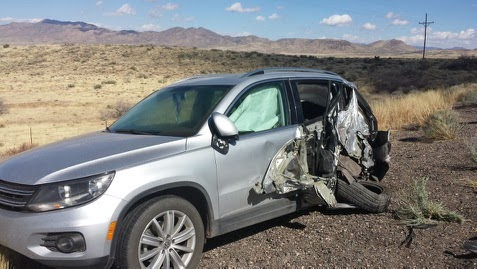

In [ ]:
Image('http://1.bp.blogspot.com/-hzoFer11Gcw/Uw_b0Z8HGAI/AAAAAAAAA4M/XjV-NrRl0iM/s1600/20140227_140935.jpg')

In [ ]:
severity_estimator('http://1.bp.blogspot.com/-hzoFer11Gcw/Uw_b0Z8HGAI/AAAAAAAAA4M/XjV-NrRl0iM/s1600/20140227_140935.jpg', loaded_model1)

Determining severity of damage...
1/1 [==============================] - 2s 2s/step
Assessment: Severe damage to vehicle
Severity assessment complete.


In [ ]:
def location_assessment(img_url,model):
    print("Determining location of damage...")
    urllib.request.urlretrieve(img_url,'save_third_gate.png')
    img = img_to_array(load_img('save_third_gate.png',target_size=(256,256)))
    img = img.reshape((1,)+img.shape)
    pred = model.predict(img)
    pred_label = np.argmax(pred,axis=1)
    d = {0:'Front',1:'Rear',2:'Side'}
    for key in d.keys():
        if key == pred_label[0]:
            print("Assessment: {} damage to vehicle".format(d[key]))
    print("Location assessment complete.")

In [ ]:
location = '/content/drive/My Drive/TVS/car-damage-dataset/data2a'
top_model_weights_path=location+'/top_model_weights.h5' # will be saved into when we create our model
fine_tuned_model_path = location+'/ft_model.h5'

In [ ]:


loaded_model2=load_model(fine_tuned_model_path )

In [ ]:
location_assessment('http://1.bp.blogspot.com/-hzoFer11Gcw/Uw_b0Z8HGAI/AAAAAAAAA4M/XjV-NrRl0iM/s1600/20140227_140935.jpg', loaded_model2)

Determining location of damage...
1/1 [==============================] - 1s 845ms/step
Assessment: Side damage to vehicle
Location assessment complete.


In [ ]:
location = '/content/drive/My Drive/TVS/car-damage-dataset/data1a'
top_model_weights_path=location+'/top_model_weights.h5' # will be saved into when we create our model
fine_tuned_model_path = location+'/ft_model.h5'



loaded_model3=load_model(fine_tuned_model_path )


In [ ]:
def car_categories_gate(img_url,model):
    urllib.request.urlretrieve(img_url,'save_second_gate.jpg')
    img = load_img('save_second_gate.jpg',target_size=(256,256))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    pred = model.predict(x)
    print("Validating that damage exists...")
    #print(pred)
    if pred[0][0] <=.5:
        print("Validation complete: Damage Detected - proceed to location and severity determination")
    else:
        print("Are you sure that your car is damaged? Please submit another picture of the damage.")
        print("Hint: Try zooming in/out, using a different angle or different lighting")

In [ ]:
car_categories_gate('http://1.bp.blogspot.com/-hzoFer11Gcw/Uw_b0Z8HGAI/AAAAAAAAA4M/XjV-NrRl0iM/s1600/20140227_140935.jpg', loaded_model3)

1/1 [==============================] - 1s 824ms/step
Validating that damage exists...
Validation complete: Damage Detected - proceed to location and severity determination
